In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%pylab inline
plt.style.use('bmh')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Infiltrating the network from inside + Normal Activity
df = pd.read_csv('../UNB/flows/TestbedSunJun13Flows.csv')
df.startDateTime = pd.to_datetime(df.startDateTime)
df.stopDateTime = pd.to_datetime(df.stopDateTime)

In [3]:
df.head()

appName  totalSourceBytes  totalDestinationBytes  \
0  Unknown_UDP           2633658                      0   
1  Unknown_UDP           2633658                      0   
2      HTTPWeb                64                    128   
3      HTTPWeb                64                    128   
4      HTTPWeb               128                     64   

   totalDestinationPackets  totalSourcePackets sourcePayloadAsBase64  \
0                        0               28971                   NaN   
1                        0               28971                   NaN   
2                        2                   1                   NaN   
3                        2                   1                   NaN   
4                        1                   2                   NaN   

  sourcePayloadAsUTF destinationPayloadAsBase64 destinationPayloadAsUTF  \
0                NaN                        NaN                     NaN   
1                NaN                        NaN                     NaN   
2                NaN                        NaN                     NaN   
3                NaN                        NaN                     NaN   
4                NaN                        NaN                     NaN   

  direction sourceTCPFlagsDescription destinationTCPFlagsDescription  \
0       L2R                       NaN                            NaN   
1       L2R                       NaN                            NaN   
2       L2L                       F,A                              R   
3       L2L                       F,A                              R   
4       L2R                       F,A                            F,A   

          source protocolName  sourcePort     destination  destinationPort  \
0  192.168.5.122       udp_ip        5353     224.0.0.251             5353   
1  192.168.5.122       udp_ip        5353     224.0.0.251             5353   
2  192.168.2.113       tcp_ip        4191   192.168.5.122               80   
3  192.168.2.113       tcp_ip        4191   192.168.5.122               80   
4  192.168.2.113       tcp_ip        4192  207.241.148.80               80   

        startDateTime        stopDateTime     Tag  
0 2010-06-12 23:57:24 2010-06-13 09:24:52  Normal  
1 2010-06-12 23:57:24 2010-06-13 09:24:52  Normal  
2 2010-06-12 23:57:38 2010-06-12 23:59:20  Normal  
3 2010-06-12 23:57:38 2010-06-12 23:59:20  Normal  
4 2010-06-12 23:57:40 2010-06-12 23:59:20  Normal

In [4]:
print(len(df.appName.unique()))
print(len(df.direction.unique()))
print(len(df.sourceTCPFlagsDescription.unique()))
print(len(df.destinationTCPFlagsDescription.unique()))
print(df.protocolName.unique())

85
4
24
20
['udp_ip' 'tcp_ip' 'ip' 'igmp' 'icmp_ip']


In [5]:
df["duration"] = (df.stopDateTime - df.startDateTime).astype('timedelta64[s]')
df.describe()

totalSourceBytes  totalDestinationBytes  totalDestinationPackets  \
count      2.755280e+05           2.755280e+05            275528.000000   
mean       1.572968e+03           2.860602e+04                24.443795   
std        8.020369e+04           7.558373e+05               545.189369   
min        0.000000e+00           0.000000e+00                 0.000000   
25%        1.280000e+02           2.560000e+02                 2.000000   
50%        3.910000e+02           9.540000e+02                 5.000000   
75%        7.850000e+02           6.050250e+03                10.000000   
max        2.848978e+07           2.588936e+08            180272.000000   

       totalSourcePackets     sourcePort  destinationPort       duration  
count       275528.000000  275528.000000    275528.000000  275528.000000  
mean            17.070272   15462.123298      1032.485584      13.099678  
std            332.291829   20746.310348      5665.095809     114.774748  
min              0.000000       0.000000         0.000000       0.000000  
25%              2.000000    2104.000000        80.000000       0.000000  
50%              5.000000    3715.000000        80.000000       1.000000  
75%             10.000000   32193.250000        80.000000       3.000000  
max          98904.000000   65533.000000     65535.000000   34048.000000

In [9]:
dff["duration"] = (dff.stopDateTime - dff.startDateTime).astype('timedelta64[s]')

df2 = dff[['totalSourceBytes', 'totalDestinationBytes', 'direction', 'destinationTCPFlagsDescription',
         'sourceTCPFlagsDescription', 'duration', 'Tag']]
df2.head()

totalSourceBytes  totalDestinationBytes direction  \
0            391223                4114484       L2R   
1            236345                5324121       L2R   
2            410420               11797592       L2R   
3            127588                2949293       L2R   
4            389781               11382564       L2R   

  destinationTCPFlagsDescription sourceTCPFlagsDescription  duration     Tag  
0                          F,P,A                     F,P,A   13721.0  Normal  
1                            NaN                       NaN   10623.0  Normal  
2                            NaN                       NaN   14369.0  Normal  
3                        F,R,P,A                       P,A   10603.0  Normal  
4                            NaN                       NaN   14256.0  Normal

In [10]:
df2 = pd.get_dummies(df2, drop_first=True)
#df3.head()
#df3.dtypes

features = list(df2.columns[:-1])
print(features)

y = df2.Tag_Normal
X = df2[features]
print(X.shape, y.shape)

['totalSourceBytes', 'totalDestinationBytes', 'duration', 'direction_L2R', 'direction_R2L', 'direction_R2R', 'destinationTCPFlagsDescription_F,A', 'destinationTCPFlagsDescription_F,P,A', 'destinationTCPFlagsDescription_F,P,A,Illegal8', 'destinationTCPFlagsDescription_F,R,A', 'destinationTCPFlagsDescription_F,R,P,A', 'destinationTCPFlagsDescription_F,S,A', 'destinationTCPFlagsDescription_F,S,P,A', 'destinationTCPFlagsDescription_F,S,P,A,Illegal8', 'destinationTCPFlagsDescription_F,S,R,A', 'destinationTCPFlagsDescription_F,S,R,P,A', 'destinationTCPFlagsDescription_F,S,R,P,A,Illegal8', 'destinationTCPFlagsDescription_P,A', 'destinationTCPFlagsDescription_R', 'destinationTCPFlagsDescription_R,A', 'destinationTCPFlagsDescription_R,A,Illegal7', 'destinationTCPFlagsDescription_R,A,Illegal7,Illegal8', 'destinationTCPFlagsDescription_R,A,Illegal8', 'destinationTCPFlagsDescription_R,P,A', 'destinationTCPFlagsDescription_S', 'destinationTCPFlagsDescription_S,A', 'destinationTCPFlagsDescription_S,

0.994890305893
[ 0.          0.04230023  1.        ] [ 0.          0.99749854  1.        ]


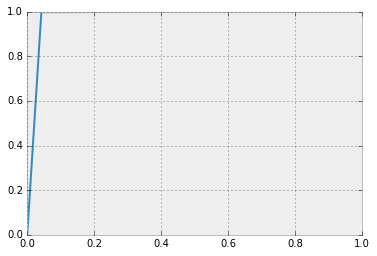

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

dt = DecisionTreeClassifier(random_state=1234)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(accuracy_score(y_pred, y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
print(fpr, tpr)
plt.plot(fpr, tpr, label='DT')

In [19]:
importances = dt.feature_importances_
indices = np.argsort(importances)[::-1]
    
# Print the feature ranking
print("Feature ranking for Decision Trees:")
for f in range(30):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]], X_train.columns[indices[f]]))

Feature ranking for Decision Trees:
1. feature 0 (0.376636) totalSourceBytes
2. feature 1 (0.280791) totalDestinationBytes
3. feature 3 (0.199632) direction_L2R
4. feature 2 (0.049151) duration
5. feature 35 (0.044238) sourceTCPFlagsDescription_F,S,P,A
6. feature 12 (0.041166) destinationTCPFlagsDescription_F,S,P,A
7. feature 44 (0.001937) sourceTCPFlagsDescription_S,P,A
8. feature 4 (0.001246) direction_R2L
9. feature 38 (0.001188) sourceTCPFlagsDescription_P,A
10. feature 26 (0.001112) destinationTCPFlagsDescription_S,P,A
11. feature 17 (0.001000) destinationTCPFlagsDescription_P,A
12. feature 31 (0.000598) sourceTCPFlagsDescription_F,P,A
13. feature 11 (0.000211) destinationTCPFlagsDescription_F,S,A
14. feature 42 (0.000203) sourceTCPFlagsDescription_S
15. feature 47 (0.000184) sourceTCPFlagsDescription_S,R,P,A
16. feature 7 (0.000156) destinationTCPFlagsDescription_F,P,A
17. feature 15 (0.000156) destinationTCPFlagsDescription_F,S,R,P,A
18. feature 34 (0.000144) sourceTCPFlagsDescr

In [17]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dt, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
    graphviz.Source(dot_graph)

In [37]:
print("Number of unique source IPs:", len(df.source.unique()))
print("Number of unique source ports:", len(df.sourcePort.unique()))
print("Number of unique destination IPs:", len(df.destination.unique()))
print("Number of unique destination ports:", len(df.destinationPort.unique()))
print("Number of unique appNames:", len(df.appName.unique()))
grouped = df.groupby(['destination', 'destinationPort'])
print("Number of destination-destination ports", len(grouped))

Number of unique source IPs: 44
Number of unique source ports: 25979
Number of unique destination IPs: 2645
Number of unique destination ports: 2476
Number of unique appNames: 85
Number of destination-destination ports 13554


In [38]:
# Traffic mix
print("Percentage of normal traffic:", df[df.Tag == 'Normal'].size / df.size)
print("Percentage of attacks:", df[df.Tag != 'Normal'].size / df.size)

Percentage of normal traffic: 0.926112772568
Percentage of attacks: 0.0738872274324


In [6]:
# Distributed Denial of Service using an IRC Botnet
df3 = pd.read_csv('../UNB/flows/TestbedTueJun15-1Flows.csv')
df4 = pd.read_csv('../UNB/flows/TestbedTueJun15-2Flows.csv')
df5 = pd.read_csv('../UNB/flows/TestbedTueJun15-3Flows.csv')

frames = [df3, df4, df5]
dff = pd.concat(frames)
dff.startDateTime = pd.to_datetime(dff.startDateTime)
dff.stopDateTime = pd.to_datetime(dff.stopDateTime)

In [7]:
# Traffic mix
print("Percentage of normal traffic:", dff[dff.Tag == 'Normal'].size / dff.size)
print("Percentage of attacks:", dff[dff.Tag != 'Normal'].size / dff.size)

Percentage of normal traffic: 0.934475894616
Percentage of attacks: 0.0655241053843


In [8]:
print("Number of unique source IPs:", len(dff.source.unique()))
print("Number of unique source ports:", len(dff.sourcePort.unique()))
print("Number of unique destination IPs:", len(dff.destination.unique()))
print("Number of unique destination ports:", len(dff.destinationPort.unique()))
print("Number of unique appNames:", len(dff.appName.unique()))
grouped2 = dff.groupby(['destination', 'destinationPort'])
print("Number of destination-destination ports", len(grouped2))

Number of unique source IPs: 2133
Number of unique source ports: 55740
Number of unique destination IPs: 23916
Number of unique destination ports: 15787
Number of unique appNames: 73
Number of destination-destination ports 26494


In [47]:
df6 = pd.read_csv('../UNB/flows/TestbedMonJun14Flows.csv')
df6.startDateTime = pd.to_datetime(df6.startDateTime)
df6.stopDateTime = pd.to_datetime(df6.stopDateTime)

print("Number of unique source IPs:", len(df6.source.unique()))
print("Number of unique source ports:", len(df6.sourcePort.unique()))
print("Number of unique destination IPs:", len(df6.destination.unique()))
print("Number of unique destination ports:", len(df6.destinationPort.unique()))
print("Number of unique appNames:", len(df6.appName.unique()))
grouped3 = df6.groupby(['destination', 'destinationPort'])
print("Number of destination-destination ports", len(grouped3))

Number of unique source IPs: 448
Number of unique source ports: 33870
Number of unique destination IPs: 7957
Number of unique destination ports: 6186
Number of unique appNames: 95
Number of destination-destination ports 11240


In [48]:
# Traffic mix
print("Percentage of normal traffic:", df6[df6.Tag == 'Normal'].size / df6.size)
print("Percentage of attacks:", df6[df6.Tag != 'Normal'].size / df6.size)

Percentage of normal traffic: 0.977967090676
Percentage of attacks: 0.0220329093243


In [33]:
attack = df[df.Tag != 'Normal']
print("Number of unique source IPs:", len(attack.source.unique()))
print("Number of unique source ports:", len(attack.sourcePort.unique()))
print("Number of unique destination IPs:", len(attack.destination.unique()))
print("Number of unique destination ports:", len(attack.destinationPort.unique()))
print("Number of unique appNames:", len(attack.appName.unique()))
grouped = attack.groupby(['destination', 'destinationPort'])
print("Number of destination-destination ports", len(grouped))

Number of unique source IPs: 19
Number of unique source ports: 516
Number of unique destination IPs: 160
Number of unique destination ports: 1011
Number of unique appNames: 79
Number of destination-destination ports 9430


In [49]:
df.dtypes

appName                                   object
totalSourceBytes                           int64
totalDestinationBytes                      int64
totalDestinationPackets                    int64
totalSourcePackets                         int64
sourcePayloadAsBase64                     object
sourcePayloadAsUTF                        object
destinationPayloadAsBase64                object
destinationPayloadAsUTF                   object
direction                                 object
sourceTCPFlagsDescription                 object
destinationTCPFlagsDescription            object
source                                    object
protocolName                              object
sourcePort                                 int64
destination                               object
destinationPort                            int64
startDateTime                     datetime64[ns]
stopDateTime                      datetime64[ns]
Tag                                       object
dtype: object

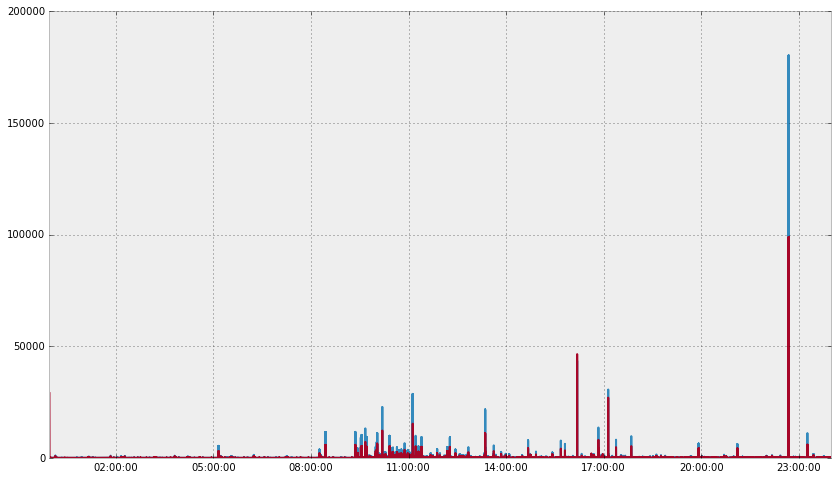

In [31]:
plt.figure(figsize=(14,8))
plt.plot(df.startDateTime, df.totalDestinationPackets)
plt.plot(df.startDateTime, df.totalSourcePackets)

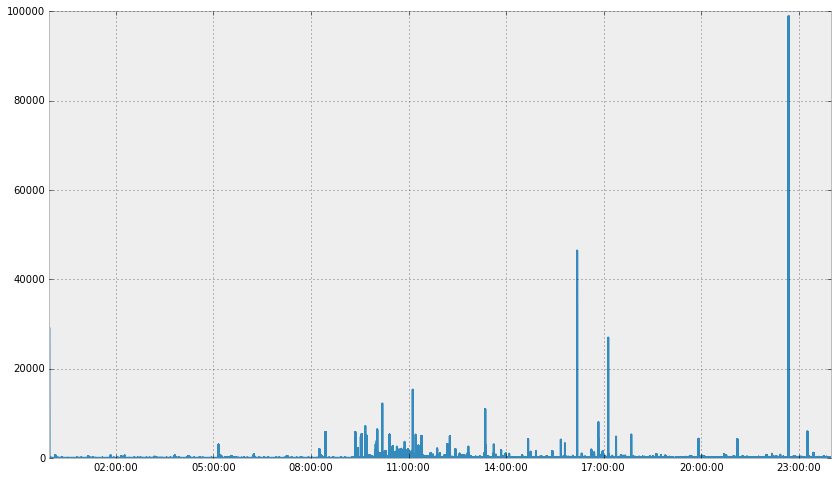

In [25]:
plt.figure(figsize=(14,8))
plt.plot(df.startDateTime, df.totalSourcePackets)

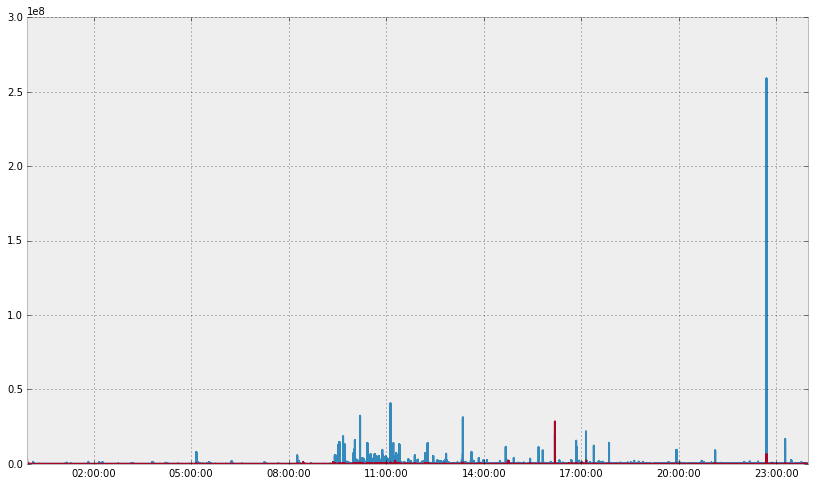

In [27]:
plt.figure(figsize=(14,8))
plt.plot(df.startDateTime, df.totalDestinationBytes)
plt.plot(df.startDateTime, df.totalSourceBytes)

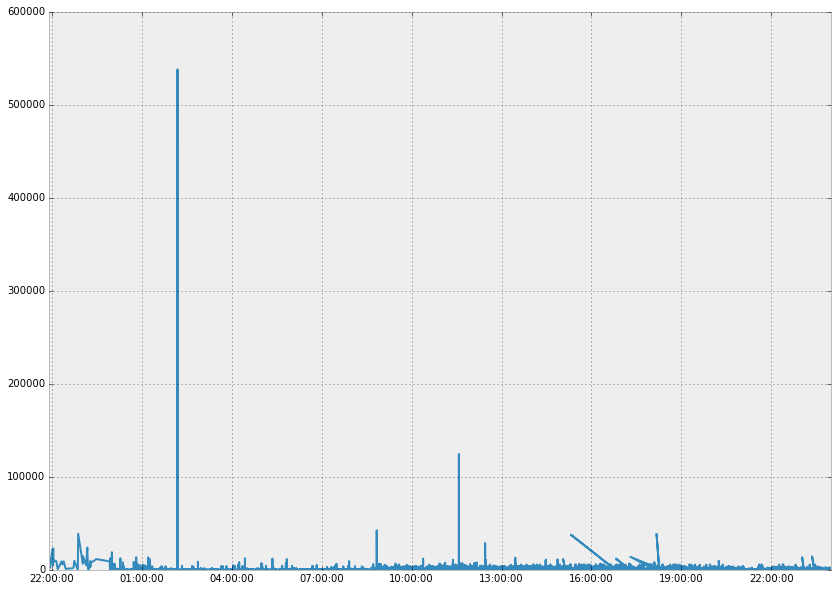

In [57]:
plt.figure(figsize=(14,10))
plt.plot(dff.startDateTime, dff.totalDestinationPackets)

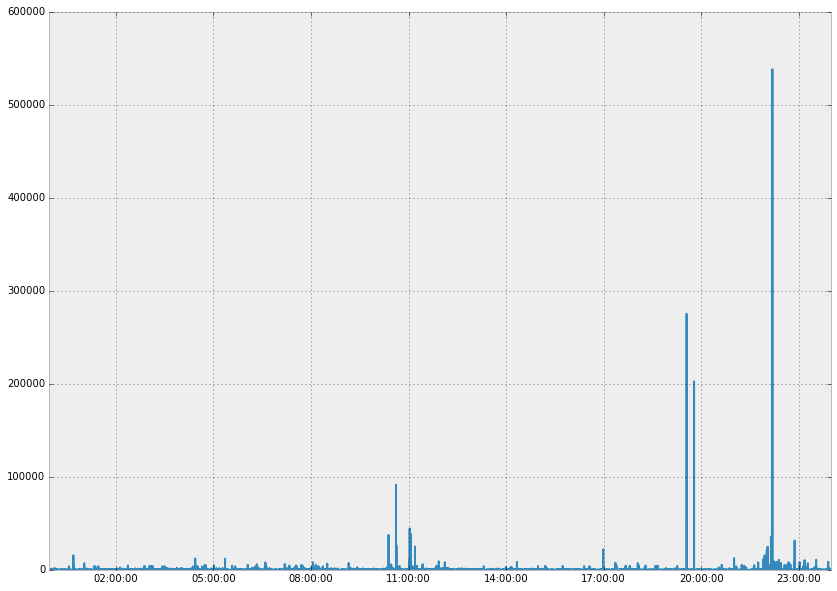

In [58]:
plt.figure(figsize=(14,10))
plt.plot(df2.startDateTime, df2.totalDestinationPackets)

In [22]:
data = pd.DataFrame([df.totalDestinationPackets, df.totalSourcePackets], index=pd.DatetimeIndex(df.startDateTime))
data.describe()

ValueError: Shape of passed values is (275528, 2), indices imply (275528, 275528)

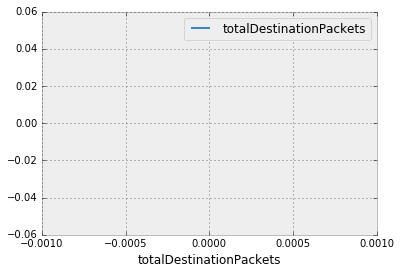

In [20]:
plt.figure(figsize=(12,8))
data.plot(style='-')
#data.resample('T').mean().plot(style=':')
#data.asfreq('T').plot(style='--');
#plt.legend(['input', 'resample', 'asfreq'],
#           loc='upper left');

In [83]:
df.startDateTime.resample('T')

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'